In [1]:
import numpy as np

In [2]:
class KMeans:
    def __init__(self, k=3, max_iter=100):
        self.k = k
        self.max_iter = max_iter

    def fit(self, X):
        X = np.array(X)
        n_samples = X.shape[0]

        np.random.seed(0)
        random_idx = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iter):
            distances = np.linalg.norm(X[:, None] - self.centroids, axis=2)

            labels = np.argmin(distances, axis=1)

            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])

            if np.allclose(new_centroids, self.centroids):
                break

            self.centroids = new_centroids

        self.labels_ = labels
        return self

    def predict(self, X):
        X = np.array(X)
        distances = np.linalg.norm(X[:, None] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


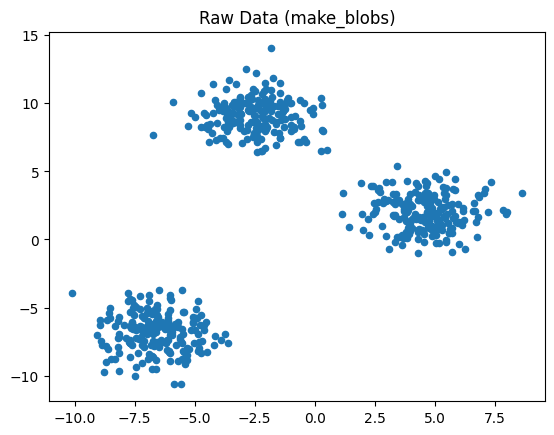

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=600, centers=3, cluster_std=1.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=20)
plt.title("Raw Data (make_blobs)")
plt.show()

In [4]:
model_scratch = KMeans(k=3, max_iter=100).fit(X)
labels_scratch = model_scratch.labels_
centroids_scratch = model_scratch.centroids

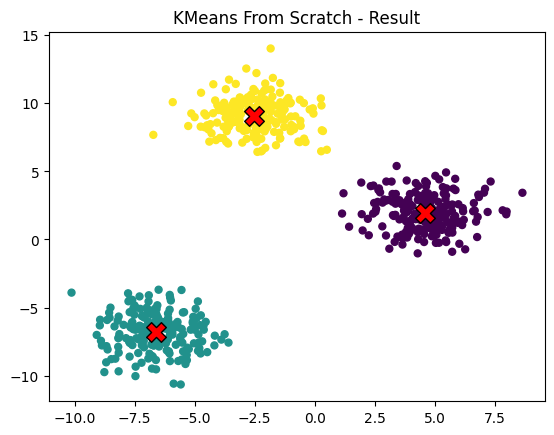

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=labels_scratch, cmap="viridis", s=25)
plt.scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], 
            c="red", marker="X", s=200, edgecolor="black")
plt.title("KMeans From Scratch - Result")
plt.show()


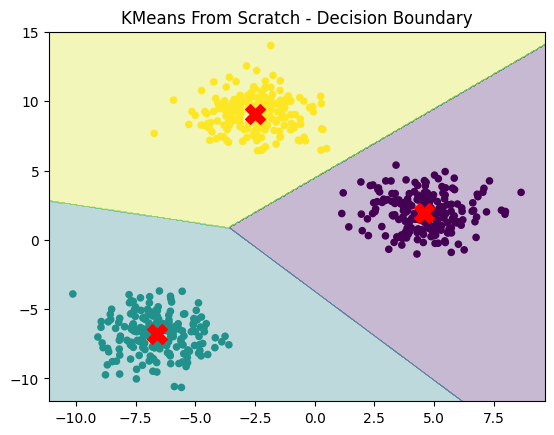

In [6]:
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = model_scratch.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X[:, 0], X[:, 1], c=labels_scratch, cmap="viridis", s=20)
plt.scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], 
            c="red", s=200, marker="X")
plt.title("KMeans From Scratch - Decision Boundary")
plt.show()


In [7]:
print("Scratch centroids:\n", centroids_scratch)

Scratch centroids:
 [[ 4.57804571  1.94363577]
 [-6.62230401 -6.78958305]
 [-2.52012446  9.05764649]]
